JERZY ANDRZEJEWSKI 230347

TASK 1

In [1]:
import skimage
import matplotlib.pyplot as plt
import numpy as np

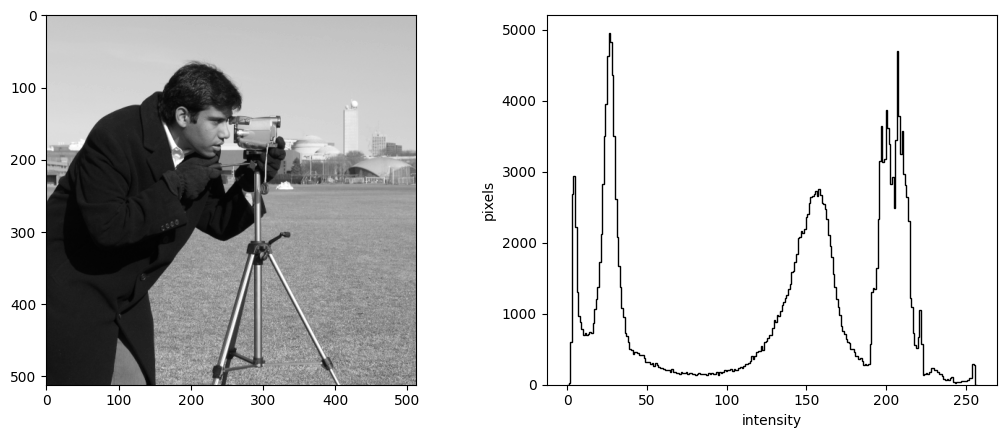

In [2]:
camera = skimage.data.camera()

counts, bins = np.histogram(camera, bins=256, range=(0,257))

fig, (imgplot, histogram) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(12.8)
imgplot.imshow(camera, cmap='gray')
histogram.hist(bins[:-1], bins, weights=counts, histtype='step', color='black')
histogram.set_xlabel('intensity')
histogram.set_ylabel('pixels')
plt.show()

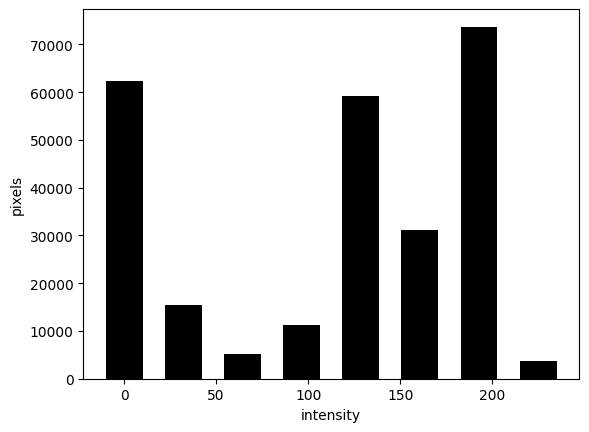

In [3]:
counts1, bins1 = np.histogram(camera, bins=8, range=(0,257))
plt.bar(bins1[:-1], counts1, width=20, color='black')
plt.xlabel('intensity')
plt.ylabel('pixels')

plt.show()

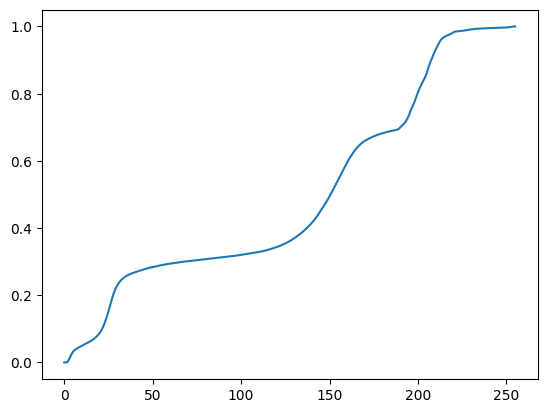

In [4]:
sum = np.cumsum(counts)[-1]

plt.plot(range(0,256), [x/sum for x in np.cumsum(counts)])
plt.show()

TASK 2

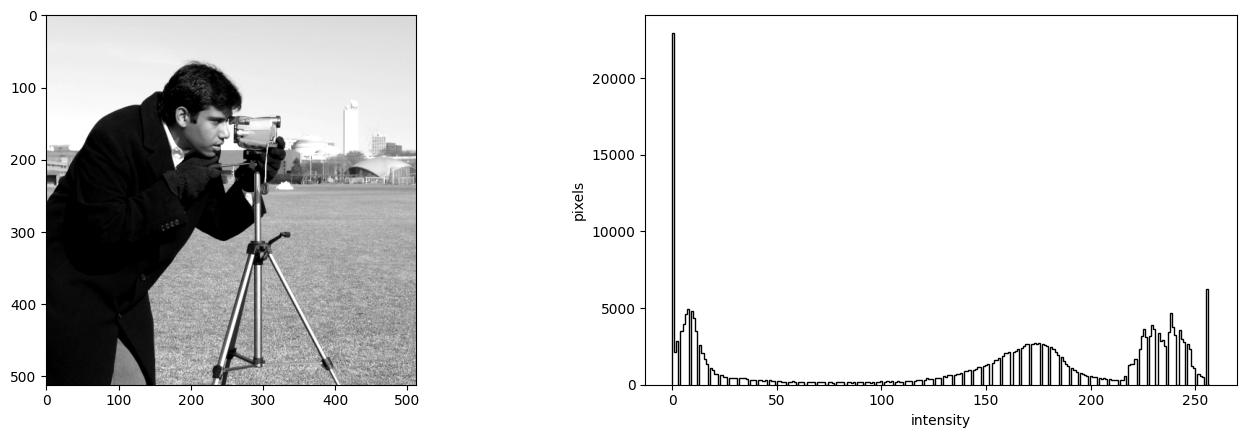

In [5]:
a = 20
b = 220

rescaled_image = skimage.exposure.rescale_intensity(camera, in_range = (a, b))
counts2, bins2 = np.histogram(rescaled_image, bins=256, range=(0,257))

fig, (imgplot, histogram) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16.8)
imgplot.imshow(rescaled_image, cmap='gray')
histogram.hist(bins2[:-1], bins2, weights=counts2, histtype='step', color='black')
histogram.set_xlabel('intensity')
histogram.set_ylabel('pixels')
plt.show()


Some buckets are empty because the pixels are kind of moved into lower or higher bucket

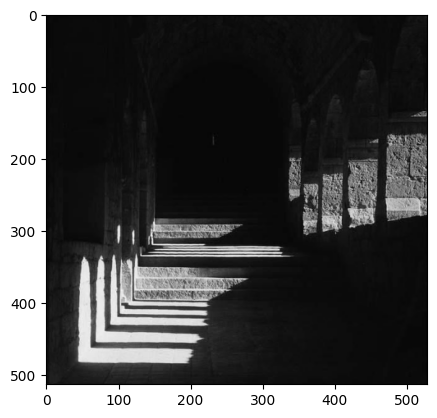

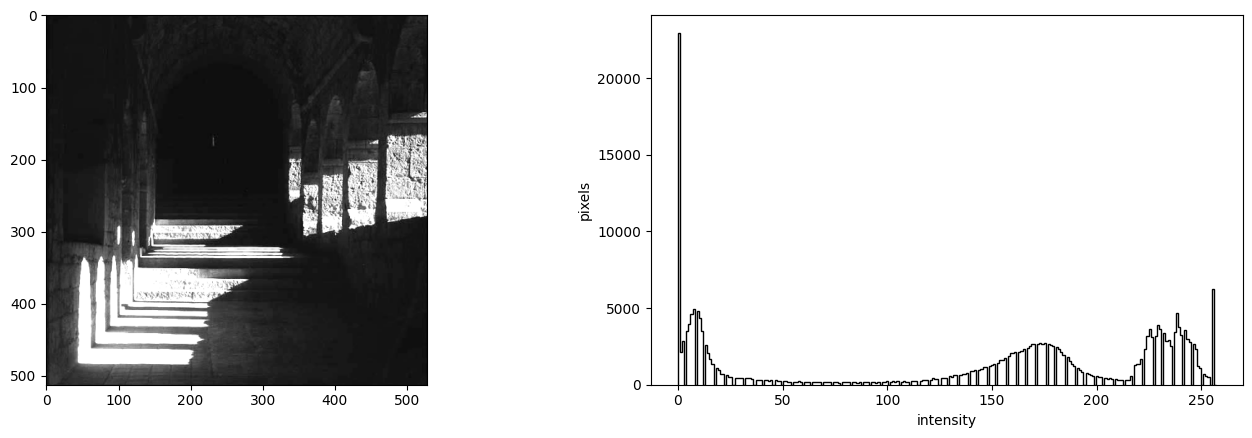

In [6]:
a = 0
b = 134
dark_image = skimage.io.imread('dark_image.png')

rescaled_dark = skimage.exposure.rescale_intensity(dark_image, in_range = (a, b))
counts3, bins3 = np.histogram(rescaled_image, bins=256, range=(0,257))

plt.imshow(dark_image)
plt.show()

fig, (imgplot, histogram) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16.8)
imgplot.imshow(rescaled_dark, cmap='gray')
histogram.hist(bins3[:-1], bins3, weights=counts3, histtype='step', color='black')
histogram.set_xlabel('intensity')
histogram.set_ylabel('pixels')
plt.show()


best gamma is under 1

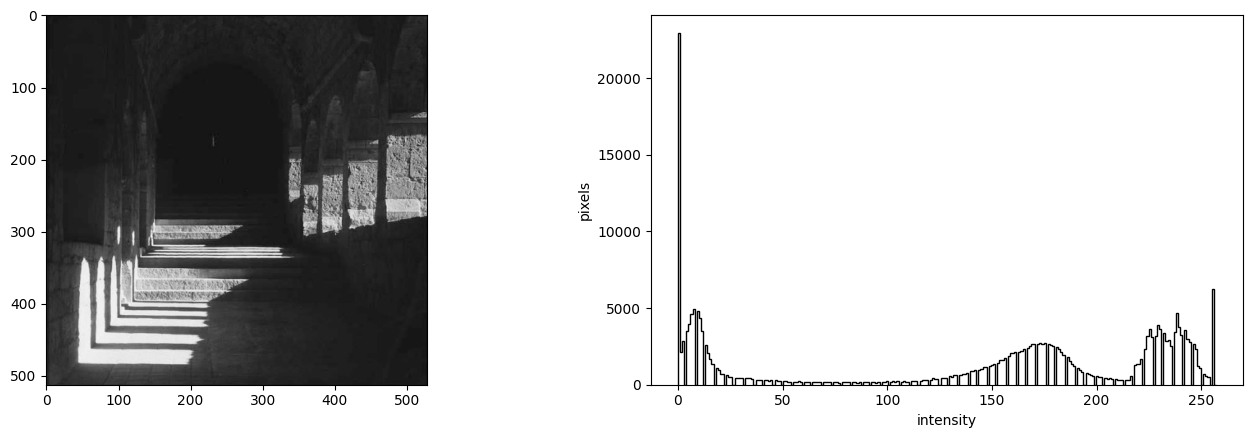

In [7]:

gamma_dark = skimage.exposure.adjust_gamma(dark_image, gamma=0.7)
counts4, bins4 = np.histogram(rescaled_image, bins=256, range=(0,257))

fig, (imgplot, histogram) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16.8)
imgplot.imshow(gamma_dark, cmap='gray')
histogram.hist(bins4[:-1], bins4, weights=counts4, histtype='step', color='black')
histogram.set_xlabel('intensity')
histogram.set_ylabel('pixels')
plt.show()

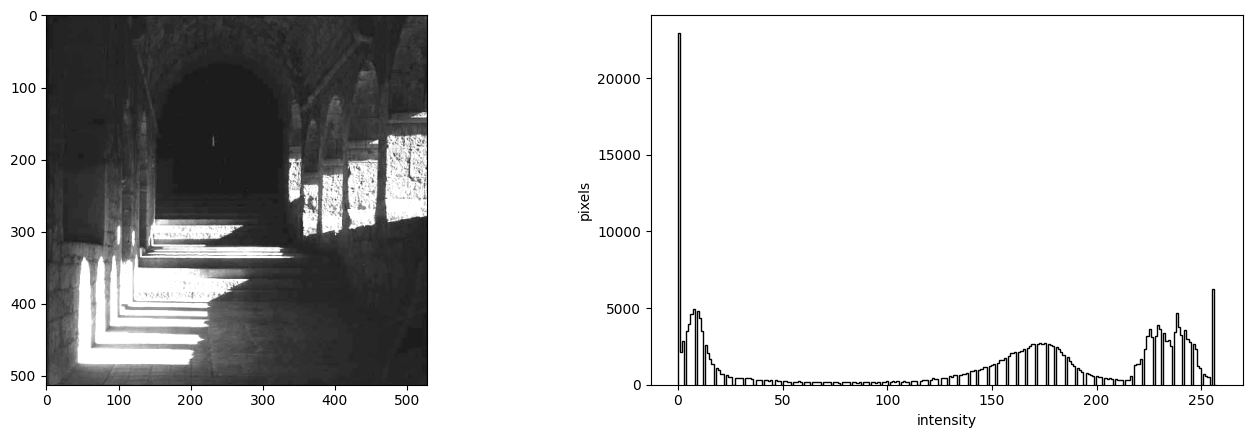

In [8]:
a1, b1 = 0, 180
gamma_dark1 = skimage.exposure.adjust_gamma(dark_image, gamma=0.8)
rescaled_dark1 = skimage.exposure.rescale_intensity(gamma_dark1, in_range = (a, b))

counts5, bins5 = np.histogram(rescaled_image, bins=256, range=(0,257))

fig, (imgplot, histogram) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16.8)
imgplot.imshow(rescaled_dark1, cmap='gray')
histogram.hist(bins5[:-1], bins5, weights=counts5, histtype='step', color='black')
histogram.set_xlabel('intensity')
histogram.set_ylabel('pixels')
plt.show()

TASK 3

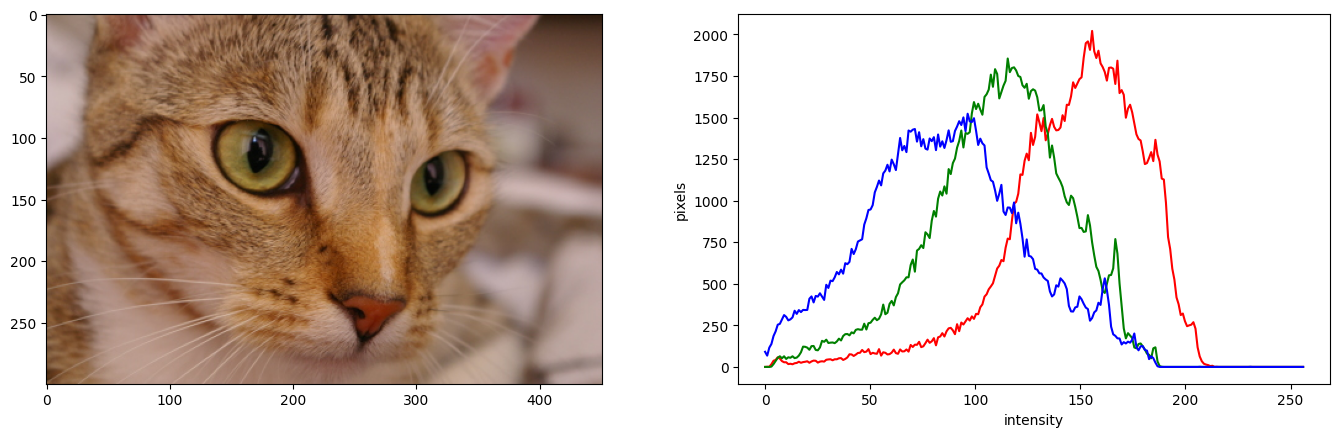

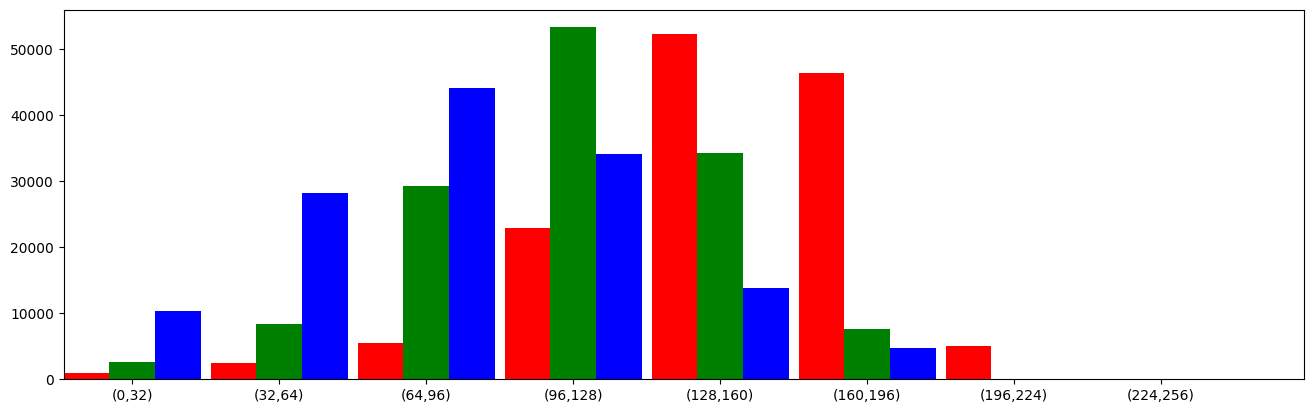

In [9]:
chelsea = skimage.data.chelsea()

counts6, bins6 = np.histogram(camera, bins=256, range=(0,257))

colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

fig, (imgplot, histogram) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16.8)
imgplot.imshow(chelsea, cmap='gray')

for channel_id, c in zip(channel_ids, colors):
    histogram1, bin_edges = np.histogram(chelsea[:, :, channel_id], bins=256, range=(0, 257))
    histogram.plot(bin_edges[0:-1], histogram1, color=c)

histogram.set_xlabel('intensity')
histogram.set_ylabel('pixels')
plt.show()

fig1 = plt.figure()
plt.xlim([-15, 256])
fig1.set_figwidth(16)
i = -10
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(chelsea[:, :, channel_id], bins=8, range=(0, 257))
    plt.bar(bin_edges[0:-1]+i, histogram, color=c, width=10)
    i += 10
plt.xticks(bin_edges[0:-1], ["(0,32)", "(32,64)", "(64,96)", "(96,128)", "(128,160)", "(160,196)", "(196,224)", "(224,256)"])
plt.show()

TASK 4

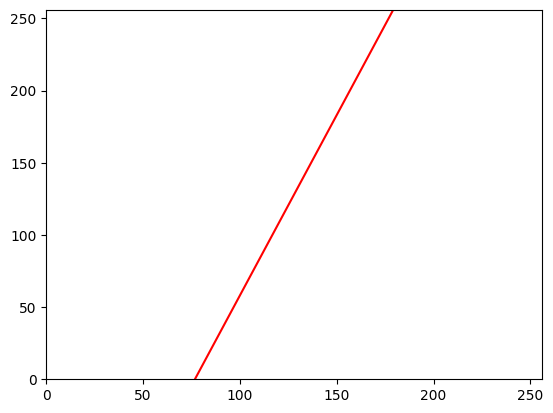

In [10]:
def lin_fun(x, a):
    b = 128 - a*128
    return a*x + b

x = np.linspace(0,255,256)

plt.xlim([0,256])
plt.ylim([0,256])
plt.plot(x, lin_fun(x, 2.5), '-r')
plt.show()



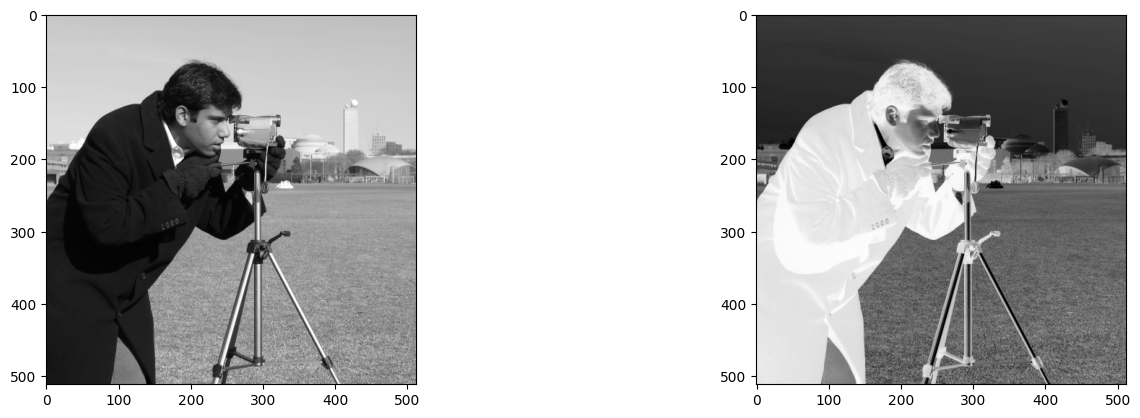

In [12]:
fig, (imgplot1, imgplot2) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16.8)
imgplot1.imshow(camera, cmap='gray')
imgplot2.imshow(lin_fun(camera, -2.5), cmap='gray')
plt.show()